# Clustering

k-means algorithm: The goal is to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. The algorithm works iteratively to assign each observation to one of k centroids. The centroids are then updated based on the mean of the observations assigned to them. This process is repeated until the centroids no longer change significantly.
Pseudocode:
```
Initialize K centroids randomly
Repeat:
    Assign each point to the nearest centroid
    Recompute centroids as the mean of assigned points
Until centroids do not change
```
### Example Use Cases
- Customer segmentation
- Image compression
- Market basket analysis
- Document clustering

cost-function for k-means: The cost function for k-means is the sum of squared distances between each point and its assigned centroid. The goal of the algorithm is to minimize this cost function.

initializing k-means: Randomly select k points from the dataset as initial centroids. This can be done by randomly selecting k indices from the dataset and using the corresponding data points as centroids.
choosing k: The number of clusters (k) can be chosen using methods like the elbow method, silhouette score, or gap statistic. 
The elbow method involves plotting the cost function against the number of clusters and looking for a "knee" point where the rate of decrease sharply changes. 
The silhouette score measures how similar an object is to its own cluster compared to other clusters. 
The gap statistic compares the performance of k-means on the actual data with a random dataset.


Often, the number of clusters is not known a priori and must be determined through experimentation.

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 


    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

In [18]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
            # Array to hold distance between X[i] and each centroids[j]
            distance = [] 
            for j in range(centroids.shape[0]):
                # calculate the norm between (X[i] - centroids[j])
                norm_ij = np.linalg.norm(X[i] - centroids[j])
                distance.append(norm_ij)
            # calculate index of minimum value in distance
            idx[i] = np.argmin(distance)
        
    return idx

In [17]:
def compute_centroids(X, idx, K):
    """
    Computes new centroids by computing the means of the data points
    assigned to each centroid.
    
    Args:
        X (ndarray): (m, n) Input values      
        idx (array_like): (m,) closest centroids
        K (int): number of clusters
    
    Returns:
        centroids (ndarray): (K, n) centroids
    """

    # Set K
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    for k in range(K):
        # get all the points assigned to centroid k
        points = X[idx == k]
        # calculate the mean of those points and assign it to centroid k
        centroids[k] = np.mean(points, axis=0)
        
    return centroids

In [16]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [15]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

# Image Compression with K-means

In [9]:
# Load an image of a bird
original_img = plt.imread('images/bird_small.png')

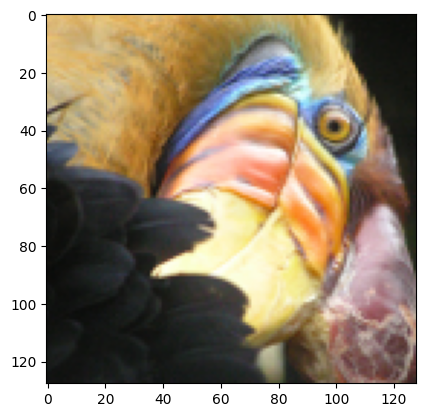

In [10]:
# Visualizing the image
plt.imshow(original_img)

In [11]:
# Check the dimension of the variable. As always, you will print out the shape of your variable to get more familiar with the data.
# the result is a tridimentional matrix were, first two indices identify a pixel position and the third index represents red, green or blue.
print("Shape of original image is:", original_img.shape)
# To call v we need to transform our data into a two-dimentional matrix. 

Shape of original image is: (128, 128, 3)


In [12]:
# Note: If you'll try this exercise later on a JPG file, you first need to divide the pixel values by 255 so it will be in the range 0 to 1. This is not necessary for PNG files (e.g. bird_small.png) because it is already loaded in the required range (as mentioned in the plt.imread() documentation). We commented a line below for this so you can just uncomment it later in case you want to try a different file
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [19]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [20]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [ 4 15 15  4  4]


AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

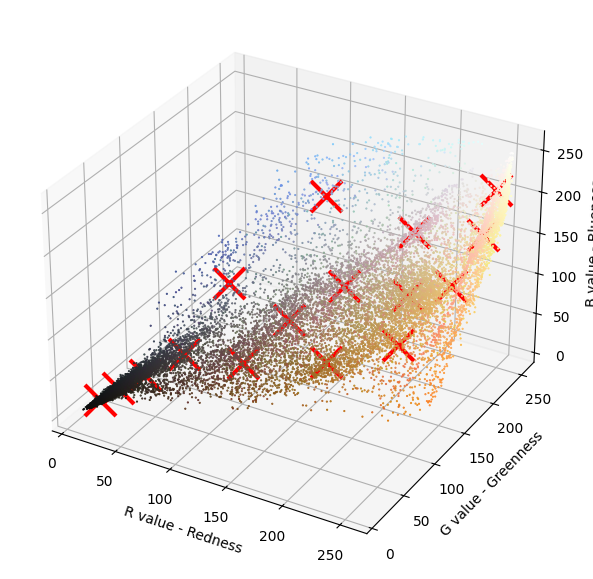

In [24]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

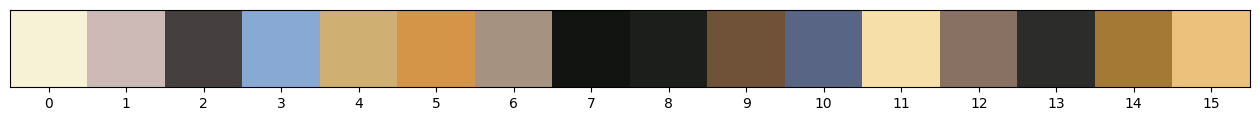

In [22]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

###  Compressing the images
After finding the top  𝐾=16 colors to represent the image, you can now assign each pixel position to its closest centroid using the find_closest_centroids function.


In [25]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 


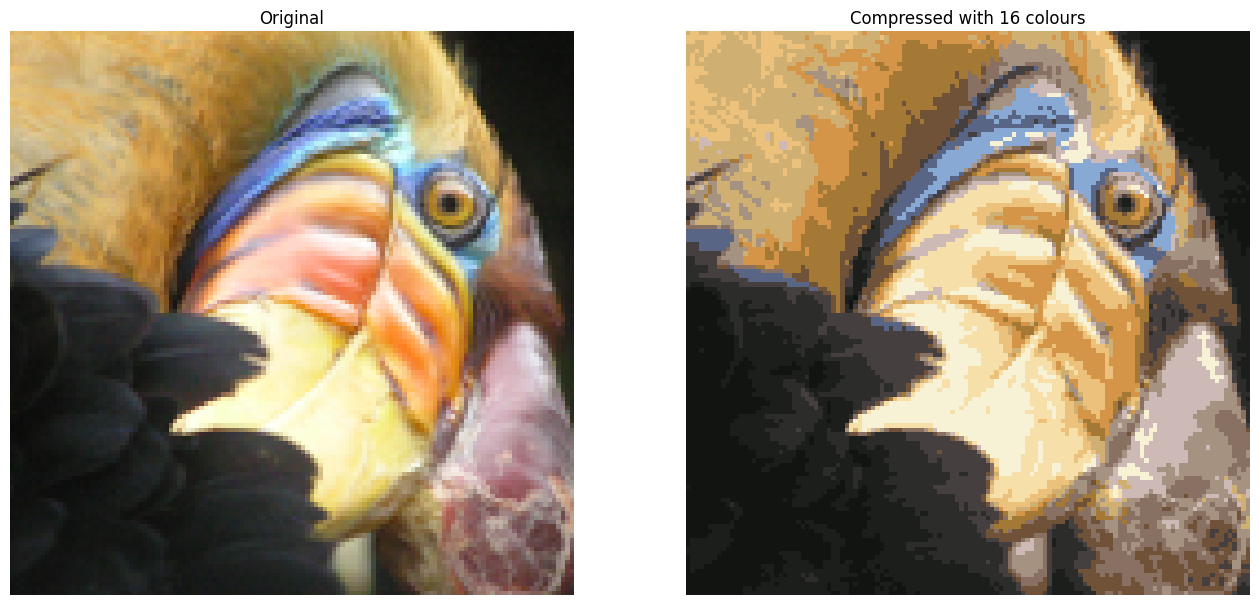

In [26]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()